<h1>Laptop Price Predictor</h1>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('laptop_data.csv')
data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


<h1>Preparación del dataset</h1>

In [4]:
data.loc[data.Price > 0, 'Price'] = data.Price / 90.59

data

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,787.931154
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,528.706515
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,338.183022
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1492.386974
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1060.777216
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,375.236119
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,881.628436
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,134.685065
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,449.342312


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [6]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [7]:
data.drop(columns=['Unnamed: 0'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [8]:
data['Ram'] = data['Ram'].str.replace('GB','')
data['Weight'] = data['Weight'].str.replace('kg','')
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [9]:
data['Ips'] = data['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
data['TouchScreen'] = data['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)


In [10]:
#Buscamos los dígitos de la resolución y seguidamente los mutiplicamos para obtener resolución total
data['X_res'] = data['ScreenResolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: int(x[0])).astype('int64')
data['Y_res'] = data['ScreenResolution'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: int(x[1])).astype('int64')

data['ppi'] = (((data['X_res']**2) + (data['Y_res']**2))**0.5/data['Inches']).astype('float')
data.drop(columns=['X_res','Y_res','ScreenResolution'],inplace=True)

data

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,TouchScreen,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,787.931154,1,0,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,528.706515,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,338.183022,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1492.386974,1,0,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1060.777216,1,0,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,375.236119,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,13.3,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,881.628436,1,1,276.053530
1300,Lenovo,Notebook,14.0,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,134.685065,0,0,111.935204
1301,HP,Notebook,15.6,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,449.342312,0,0,100.454670


Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

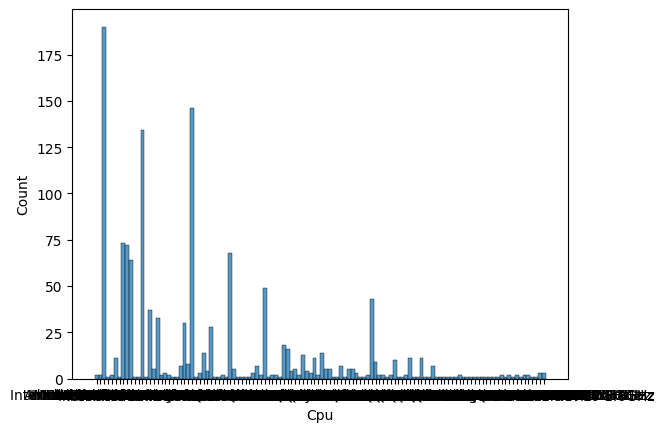

In [11]:
import seaborn as sns

sns.histplot(data=data,x='Cpu')
data['Cpu'].value_counts()

<Axes: xlabel='CpuType', ylabel='Count'>

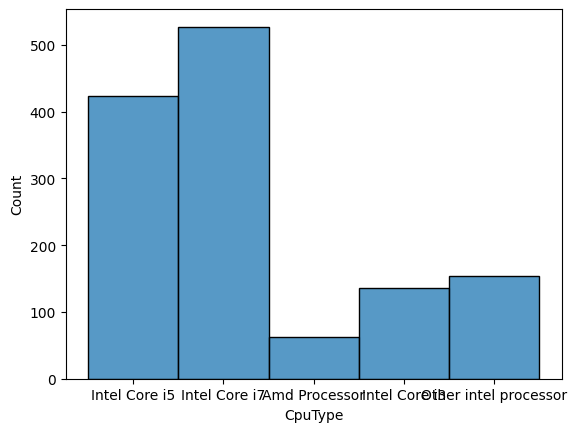

In [12]:
def cpu_type_define(text):
    text = text.split(' ')
    if text[0] == 'Intel':
        if text[2][0] == 'i':
            return text[0]+' '+text[1]+' '+text[2] 
        
        return 'Other intel processor'
    else:
        return 'Amd Processor'

data['CpuType'] = data['Cpu'].apply(cpu_type_define)
data = data.drop(columns=['Cpu'])
sns.histplot(data=data,x='CpuType')

In [13]:
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB','')
data['Memory'] = data['Memory'].str.replace('TB','000')

def column_type_create(info):
    disc_info = info.split(' ')
    data[disc_info[1]] = 0
        
data['Memory'].apply(column_type_create)
data.drop(columns=['Flash','Hybrid'],inplace=True)

data

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,Ips,TouchScreen,ppi,CpuType,SSD,HDD
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,787.931154,1,0,226.983005,Intel Core i5,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,528.706515,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,338.183022,0,0,141.211998,Intel Core i5,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,1492.386974,1,0,220.534624,Intel Core i7,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,1060.777216,1,0,226.983005,Intel Core i5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,375.236119,1,1,157.350512,Intel Core i7,0,0
1299,Lenovo,2 in 1 Convertible,13.3,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,881.628436,1,1,276.053530,Intel Core i7,0,0
1300,Lenovo,Notebook,14.0,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,134.685065,0,0,111.935204,Other intel processor,0,0
1301,HP,Notebook,15.6,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,449.342312,0,0,100.454670,Intel Core i7,0,0


In [14]:
def disc_type(disc, disc_type):
    if disc_type in disc:
        if not '+' in disc:
            return disc.split(' ')[0]
        else:
            disc_array = disc.split('+')
            discGB = [i for i,j in enumerate(disc_array) if j==disc_type]
            if len(discGB)==0:
                return 0
            return discGB 
    return 0
 
data['SSD'] = data.apply(lambda data: disc_type(data['Memory'],'SSD'),axis=1)
data['HDD'] = data.apply(lambda data: disc_type(data['Memory'],'HDD'),axis=1)
data = data.drop(columns='Memory')

<Axes: xlabel='TypeName', ylabel='Count'>

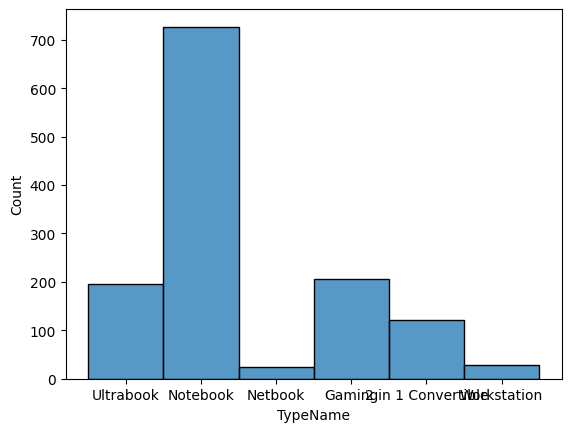

In [15]:
sns.histplot(data=data,x='TypeName')

In [16]:
data['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

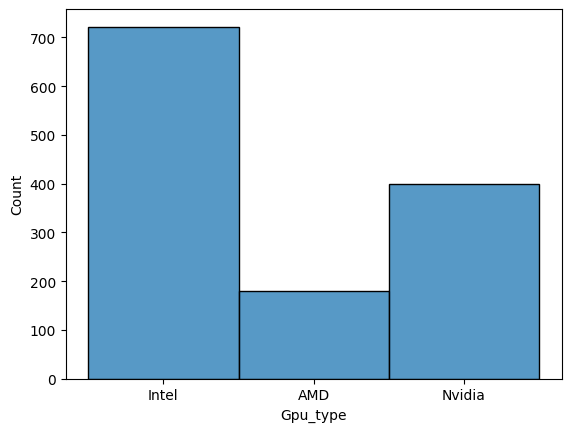

In [17]:
data['Gpu_type'] = data['Gpu'].apply(lambda x: x.split(' ')[0] if x.split(' ')[0] != 'ARM' else None)
sns.histplot(data=data,x='Gpu_type')
data = data.drop(data[data['Gpu_type'].isnull()].index)
data.drop(columns='Gpu',inplace=True)


In [18]:
def define_sys(sys):
    if sys == 'Windows 10' or sys == 'Windows 7' or sys == 'Windows 10 S':
        return 'Windows'
    elif sys == 'macOS' or sys == 'Mac OS X':
        return 'Apple'
    else:
        return 'Other/No OS/ Linux'

data['OpSys'] = data['OpSys'].apply(define_sys)

data['OpSys'].value_counts()

OpSys
Windows               1125
Other/No OS/ Linux     156
Apple                   21
Name: count, dtype: int64

In [19]:
data['Price'] = data['Price'].apply(lambda x: int(x))
data

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,Ips,TouchScreen,ppi,CpuType,SSD,HDD,Gpu_type
0,Apple,Ultrabook,13.3,8,Apple,1.37,787,1,0,226.983005,Intel Core i5,128,0,Intel
1,Apple,Ultrabook,13.3,8,Apple,1.34,528,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Other/No OS/ Linux,1.86,338,0,0,141.211998,Intel Core i5,256,0,Intel
3,Apple,Ultrabook,15.4,16,Apple,1.83,1492,1,0,220.534624,Intel Core i7,512,0,AMD
4,Apple,Ultrabook,13.3,8,Apple,1.37,1060,1,0,226.983005,Intel Core i5,256,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,Windows,1.80,375,1,1,157.350512,Intel Core i7,128,0,Intel
1299,Lenovo,2 in 1 Convertible,13.3,16,Windows,1.30,881,1,1,276.053530,Intel Core i7,512,0,Intel
1300,Lenovo,Notebook,14.0,2,Windows,1.50,134,0,0,111.935204,Other intel processor,0,0,Intel
1301,HP,Notebook,15.6,6,Windows,2.19,449,0,0,100.454670,Intel Core i7,0,1000,AMD


In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve, RocCurveDisplay,auc

encoded_data = data

X_train = encoded_data.drop(columns='Price')
Y_train = np.log(encoded_data['Price'])

X_train, X_val,y_train,Y_val = train_test_split(X_train,Y_train,test_size=0.15,random_state=42)

X_train

,Company,TypeName,Inches,Ram,OpSys,Weight,Ips,TouchScreen,ppi,CpuType,SSD,HDD,Gpu_type
945,Lenovo,Gaming,15.6,16,Windows,2.50,1,0,141.211998,Amd Processor,0,0,AMD
428,HP,Gaming,17.3,12,Windows,3.35,0,0,127.335675,Intel Core i7,0,0,Nvidia
1261,Asus,Ultrabook,13.3,8,Windows,1.20,1,0,165.632118,Other intel processor,512,0,Intel
174,HP,Notebook,17.3,8,Windows,2.50,0,0,127.335675,Intel Core i5,256,0,Nvidia
398,Dell,Workstation,15.6,8,Windows,1.78,0,1,282.423996,Intel Core i7,256,0,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,Acer,Notebook,15.6,8,Windows,2.40,0,0,141.211998,Intel Core i5,0,0,Nvidia
1130,HP,Notebook,15.6,8,Windows,2.04,0,0,100.454670,Intel Core i7,0,2000,Intel
1295,Dell,Notebook,15.6,8,Other/No OS/ Linux,2.30,0,0,100.454670,Intel Core i7,0,1000,AMD
860,Lenovo,Notebook,15.6,8,Windows,2.30,1,0,141.211998,Intel Core i5,0,1000,Intel


<h1>Logistic Regresion</h1>

In [21]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')
step2 = LogisticRegression(n_jobs=-1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

X_train = encoded_data.drop(columns='Price', axis=1)
Y_train = encoded_data['Price']

pipe.fit(X_train,Y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score -1501232.5637581819
MAE 653.469801266256


<h1>Random Forest</h1>

In [22]:
from sklearn.ensemble import RandomForestRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [1302, 1106]

<h1>Linear Regression</h1>

In [ ]:
from sklearn.linear_model import LinearRegression

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.7940257211728197
MAE 0.21360551271364742


<h1>Extra tree regresor</h1>

In [ ]:
from sklearn.tree import ExtraTreeRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

step2 = ExtraTreeRegressor(max_depth=10,random_state=70)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8180824088310228
MAE 0.1954478269089182


<h1>Gradient Boost</h1>

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8622961897041456
MAE 0.16554817645787312


<h1>XGBoost</h1>

In [ ]:
from xgboost import XGBRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8662424175262803
MAE 0.16251205867573637


<h1>Voting Regressor</h1>


In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

rf = RandomForestRegressor(n_estimators=100,
                              random_state=42,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=500)
xgb = XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb)],weights=[5,1,1])


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))

R2 score 0.8676169283008918
MAE 0.16303816461066362


<h1>Stacking</h1>


In [ ]:
from sklearn.linear_model import Ridge


step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,4,9,12])
],remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=42,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=45,learning_rate=0.5,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))


pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

Y_pred = pipe.predict(X_val)

print('R2 score',r2_score(Y_val,Y_pred))
print('MAE',mean_absolute_error(Y_val,Y_pred))


R2 score 0.8609644921561128
MAE 0.1731512524217396


In [ ]:
import pickle

pickle.dump(data,open('data.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))